In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Load data from CSV
FILENAME = "KKP-ACT-FIXED.csv"
df = pd.read_csv(FILENAME, parse_dates=["DATE"])
# Remove unused columns
df = df.drop(columns=["THAIDATE","Month"]).rename(columns={"DATE": "Date"})

# Pandas recommends avoiding sort with inplace=True due to possibly unexpected behavior
df = df.sort_values("Date", ascending=True).reset_index(drop=True)

# Ensure Date is datetime and set as index
df = df.set_index("Date")

# Use only recent data
df = df.tail(90)

df.tail(10)


,NAV
Date,
2025-08-29,12.2915
2025-09-01,12.2974
2025-09-02,12.2987
2025-09-03,12.2999
2025-09-04,12.3047
2025-09-05,12.3086
2025-09-08,12.3125
2025-09-09,12.3168
2025-09-10,12.3136


In [45]:
# Compute the relative price differences including effect of time (number of days between rows).
# days = df["Date"].diff().dt.days
# If the "Date" is the index, you can also do this:
days = df.index.to_series().diff().dt.days

# Window size for moving averages
window_size = 5

# diff() gives absolute diff, pct_change() is relative change (x(t)-x(t-1))/x(t-1)
df["NAV_DIF"] = df["NAV"].diff() / days
df["NAV_DIF_PCT"] = df["NAV"].pct_change() / days * 100

# N-day moving average of price based on number of elapsed calendar days
window = f"{window_size}D"  # "5D"
df["NAV_MA"] = df["NAV"].rolling(window).mean()

# statistical magnitude of NAV deviatiation from MA
df["Dev_%"] = (df["NAV"] - df["NAV_MA"]) / df["NAV_MA"] * 100

df.tail(20)

,NAV,NAV_DIF,NAV_DIF_PCT,NAV_MA,Dev_%,Daily_return,Return_Z_Score,Upper_Band,Lower_Band,Upper_1std,Upper_2std,Lower_1std,Lower_2std
Date,,,,,,,,,,,,,
2025-08-15,12.2801,-0.000600,-0.004886,12.276633,0.028238,-0.004886,-0.990516,0.116556,-0.045880,0.075947,0.116556,-0.005271,-0.045880
2025-08-18,12.2839,0.001267,0.010315,12.281567,0.018999,0.030944,-0.395982,0.137190,-0.040183,0.092847,0.137190,0.004160,-0.040183
2025-08-19,12.2829,-0.001000,-0.008141,12.282300,0.004885,-0.008141,-0.985011,0.129185,-0.054835,0.083180,0.129185,-0.008830,-0.054835
2025-08-20,12.2843,0.001400,0.011398,12.283700,0.004885,0.011398,-0.505754,0.117823,-0.052066,0.075351,0.117823,-0.009594,-0.052066
2025-08-21,12.2832,-0.001100,-0.008955,12.283575,-0.003053,-0.008955,-0.856348,0.110646,-0.056841,0.068774,0.110646,-0.014969,-0.056841
2025-08-22,12.2828,-0.000400,-0.003256,12.283420,-0.005047,-0.003256,-0.656353,0.103544,-0.057278,0.063338,0.103544,-0.017073,-0.057278
2025-08-25,12.2892,0.002133,0.017368,12.285067,0.033645,0.052105,1.611139,0.061701,-0.037002,0.037025,0.061701,-0.012326,-0.037002
2025-08-26,12.2888,-0.000400,-0.003255,12.286933,0.015192,-0.003255,-0.574404,0.056690,-0.036450,0.033405,0.056690,-0.013165,-0.036450
2025-08-27,12.2884,-0.000400,-0.003255,12.288800,-0.003255,-0.003255,-0.530271,0.052589,-0.035692,0.030519,0.052589,-0.013622,-0.035692


In [46]:
# Z-scores and Bollinger Bands using daily returns
# Same as above:
days = df.index.to_series().diff().dt.days
# for Logarithmic returns use:
# daily_return = np.log(df["NAV"] / df["NAV"].shift(1))
# for simple % differences use
daily_return = (df["NAV"] / df["NAV"].shift(1) - 1) * 100
# Window size (days) for rolling averages (or use same size as MA window)
window = f"{window_size}D"
rolling_mean = daily_return.rolling(window).mean()
rolling_std = daily_return.rolling(window).std()

df["Daily_return"] = daily_return
df["Return_Z_Score"] = (daily_return - rolling_mean) / rolling_std

# Bollinger Bands of Daily Returns
stdev = 2
df["Upper_1std"] = rolling_mean + 1 * rolling_std
df["Upper_2std"] = rolling_mean + 2 * rolling_std
df["Lower_1std"] = rolling_mean - 1 * rolling_std
df["Lower_2std"] = rolling_mean - 2 * rolling_std



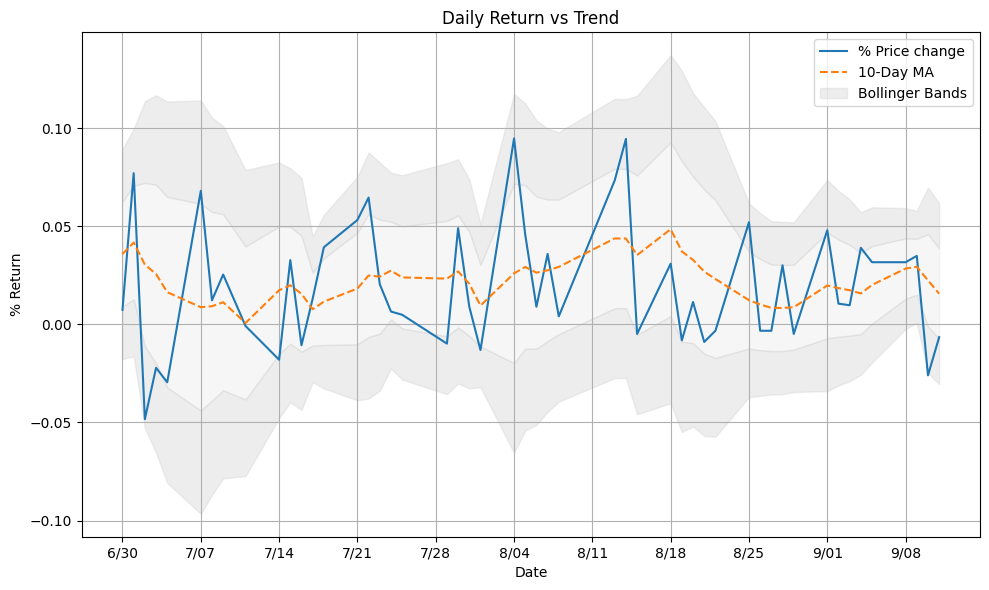

In [44]:
# Plot NAV, SMA, and Bollinger Bands
# Plot recent data instead of entire df
plot_days = 10 * 5

import matplotlib.dates as mdates
# Locate x-ticks every 5 days
# xticks = mdates.DayLocator(interval=5)
# Locate x-ticks on Mondays
xticks = mdates.WeekdayLocator(byweekday=mdates.MO)
# Automatic tick locator
# xticks = mdates.AutoDateLocator()

recent = df.tail(plot_days)

plt.figure(figsize=(10,6))
# The df.index is Date, so plot df.index instead of df["Date"]
plt.plot(recent.index, recent["Daily_return"], label="% Price change")  # marker="o"
plt.plot(recent.index, rolling_mean.tail(plot_days), label=f"{window_size}-Day MA", linestyle="--")

# Separate Bollinger Bands into 1 and 2-stdev
fill_color = "lightgray"
plt.fill_between(recent.index, recent["Lower_2std"], recent["Lower_1std"],  color=fill_color, alpha=0.4,
                 label="Bollinger Bands")
plt.fill_between(recent.index, recent["Upper_2std"], recent["Upper_1std"],  color=fill_color, alpha=0.4)
# middle band
plt.fill_between(recent.index, recent["Lower_1std"], recent["Upper_1std"],  color=fill_color, alpha=0.2)

# concise format for dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%-m/%d"))  # "m/dd" format
plt.gca().xaxis.set_major_locator(xticks)
plt.title("Daily Return vs Trend")
plt.xlabel("Date")
plt.ylabel("% Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

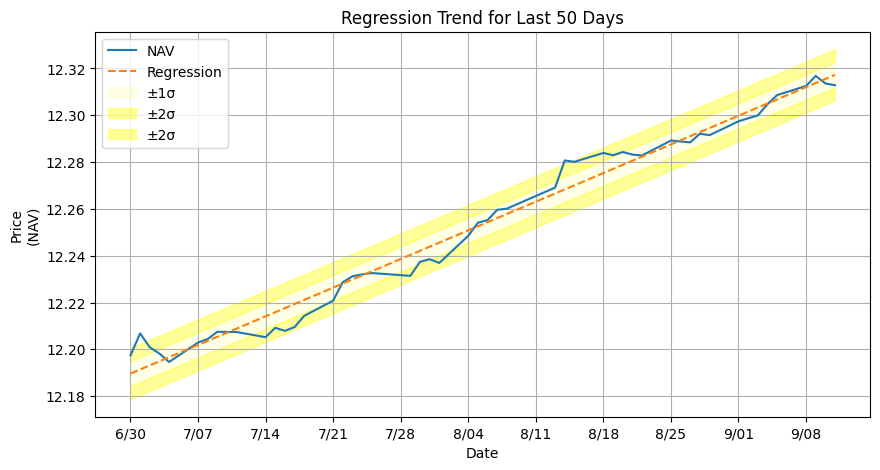

In [43]:
# Regression of NAV and regression trend line for last N days
N = 10 * 5
recent = df.tail(N).copy()
# Convert dates to integer number of days since beginning of the data
X = (recent.index - recent.index[0]).days.values.reshape(-1,1)
Y = recent["NAV"].values

model = LinearRegression().fit(X, Y)
trend = model.predict(X)

# For confidence bands
residuals = Y - trend
sigma = np.std(residuals)

plt.figure(figsize=(10,5))
plt.plot(recent.index, Y, label="NAV")  # marker="o"
plt.plot(recent.index, trend, linestyle="--", label="Regression")

# 1- and 2-stdev bands
fill_color = "yellow"
plt.fill_between(recent.index, trend - sigma, trend + sigma, color=fill_color, alpha=0.1, label="±1σ")
plt.fill_between(recent.index, trend - 2*sigma, trend - 1*sigma, color=fill_color, alpha=0.4, label="±2σ")
plt.fill_between(recent.index, trend + 2*sigma, trend + 1*sigma, color=fill_color, alpha=0.4, label="±2σ")

# concise format for dates on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%-m/%d"))  # "m/dd" format
# Locate x-ticks every 5 days:
# xticks = mdates.DayLocator(interval=5)
# Locate x-ticks on Mondays
xticks = mdates.WeekdayLocator(byweekday=mdates.MO)
# Automatic tick locator
# xticks = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(xticks)
plt.title(f"Regression Trend for Last {N} Days")
plt.xlabel("Date")
plt.ylabel("Price\n(NAV)")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Same thing using Deviation %%!
rolling_mean = df["NAV"].rolling(window=window_size).mean()
rolling_std = df["NAV"].rolling(window=window_size).std()
df["NAV_Z_Score"] = (df["NAV"] - rolling_mean) / rolling_std